In [1]:
from __future__ import division
import os
import sys
import copy
import numpy as np
from numpy import ma
import math as m
import pandas as pd
import matplotlib.patches as mpatches
import string
#import cmasher as cmr

import pickle
from numpy import genfromtxt
from scipy.interpolate import griddata
from matplotlib import rc
import matplotlib.pyplot as plt
plt.style.use('default')
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
import matplotlib.colors as colors
from matplotlib.pyplot import figure
from matplotlib.lines import Line2D

import datetime
from matplotlib.dates import DayLocator, MonthLocator, HourLocator, AutoDateLocator, DateFormatter, drange
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU, WeekdayLocator
from numpy import arange
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import NullFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.cm as cm
import matplotlib.mlab as mlab

import glob

In [2]:
# Font / Figure Size
import matplotlib.pylab as pylab
params = {'legend.fontsize': '10',
         'axes.labelsize': '10',
         'axes.titlesize': '12',
         'xtick.labelsize': '10',
         'ytick.labelsize': '10',
          
         'xtick.major.pad': '7',
         'ytick.major.pad': '7',
         'axes.titlepad': 30,
         'axes.labelpad': 15,
         
         'font.sans-serif':'Avenir'}
pylab.rcParams.update(params)

In [3]:
# Custom Colors

darkblue = '#4e79a7'
orange = '#f28e2b'
red = '#e15759'
lightblue = '#76b7b2'
green = '#59a14f'
yellow = '#edc948'
purple = '#b07aa1'
pink = '#ff9da7'
brown = '#9c755f'
gray = '#bab0ac'

tech_names = ['Li-ion', 'Vanadium RFB', 'PSH', 'Gravitational', 'Thermal', 'CAES', 'Metal-Air', 'PGP']
color_list = [purple, green, darkblue, red, orange, lightblue, gray, pink]
order_of_plotting = [0, 1, 4, 7, 3, 5, 4, 5]

In [4]:
file_name = '../Summary_of_Storage_Tech_Costs.xlsx'
sheet1 = 'Total Overnight Costs' # 'toc'
toc = pd.read_excel(io=file_name, sheet_name=sheet1, skiprows=1, header=0)

In [5]:
def draw_rectangle(ax, index, tech_name, energy_low, energy_high, power_low, power_high, order):
    energy_range = energy_high - energy_low
    power_range = power_high - power_low
    # Draw in reverse order so rectangles don't completely cover each other
    ax.add_patch(mpatches.Rectangle((energy_low, power_low), energy_range, power_range, edgecolor='dimgray', 
                           facecolor=color_list[index], fill=True, linewidth=0.5, zorder=order,
                                   label=tech_name))

def pie_chart(ax, index, tech_name, energy_midpoint, power_midpoint, RTE):
    theta = (RTE * 360 - 90)
    radius = 0.05
    ax.add_patch(mpatches.Circle((energy_midpoint, power_midpoint), radius, edgecolor=gray,
                                 facecolor='white', fill=True, lw=1, transform=ax.transAxes, clip_on=False,
                                zorder=0))
    ax.add_patch(mpatches.Wedge((energy_midpoint, power_midpoint), radius, -theta, 90, 
                                facecolor=color_list[index], fill=True, linewidth=None,
                               transform=ax.transAxes, clip_on=False))

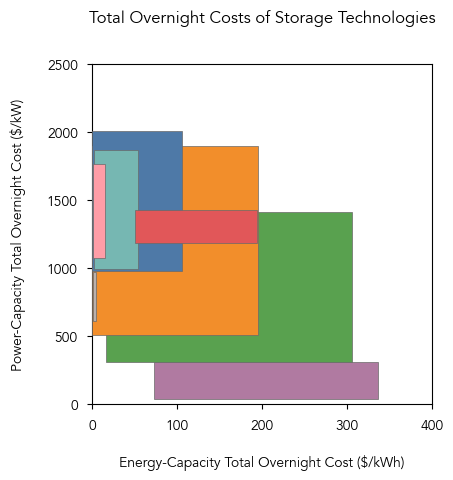

In [6]:
# Plot Figure

mm = 1/25.4 # millimeters in inches
fig_w = 112*mm
fig_h = 112*mm
fig = plt.subplots(nrows=1,ncols=1, figsize=(fig_w,fig_h))

#########################################
#         Total Installed Costs         #
#########################################

ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)
ax1.set_title('Total Overnight Costs of Storage Technologies')
ax1.set_xlabel('Energy-Capacity Total Overnight Cost ($/kWh)')
ax1.set_ylabel('Power-Capacity Total Overnight Cost ($/kW)')
max_energy_tic = 400
max_power_tic = 2500
ax1.set_xlim(0, max_energy_tic)
ax1.set_ylim(0, max_power_tic)
ax1.set_xticks([0, 100, 200, 300, 400])

# Draw rectangles and pie charts

for i, tech_name in enumerate(tech_names):
    tech_tic = toc.iloc[i]
    energy_midpoint = tech_tic['Energy Base Case']
    power_midpoint = tech_tic['Power Base Case']
    
    # Total Installed Costs
    #if i == 0 or i == 7 or i == 2:
    draw_rectangle(ax1, i, tech_name, tech_tic['Energy Low'], tech_tic['Energy High'], 
                   tech_tic['Power Low'], tech_tic['Power High'], order_of_plotting[i])   


ax1.set_box_aspect(1)

if not os.path.exists('Figures'):
    os.makedirs('Figures')
plt.savefig('Figures/Fig_1_Energy_and_Power_Capacity_Costs.png', dpi=300, bbox_inches='tight')